In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score


In [2]:
df = pd.read_csv('processed.cleveland.data')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


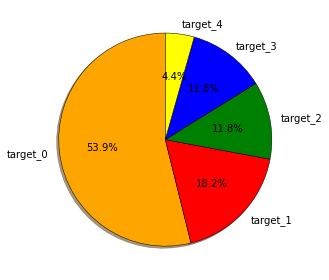

In [5]:
plt.style.use('fivethirtyeight')

seg0 = df[df['target'] == 0].shape[0]
seg1 = df[df['target'] == 1].shape[0]
seg2 = df[df['target'] == 2].shape[0]
seg3 = df[df['target'] == 3].shape[0]
seg4 = df[df['target'] == 4].shape[0]

class_ = [seg0,seg1, seg2, seg3,seg4]
label = ['target_0','target_1', 'target_2', 'target_3','target_4']

plt.pie(class_, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['orange','red', 'green', 'blue','yellow'])

plt.tight_layout()
plt.show()

In [6]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [7]:
X.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
296,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [8]:
Y.head(3)

0    0
1    2
2    1
Name: target, dtype: int64

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    X, 
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=0)

In [10]:
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)

X_train (237, 13)
Y_train (237,)


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
print(df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object


In [13]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)


### PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components = 2)

In [16]:
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [17]:
explained_varience = pca.explained_variance_ratio_
explained_varience

array([0.27141279, 0.15717025])

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
LG = LogisticRegression(random_state=0)
LG.fit(X_train,Y_train)
Y_pred=LG.predict(X_test)
Y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 3, 0, 3, 1, 2, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0,
       0, 1, 2, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 1, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[28,  2,  0,  0,  0],
       [ 9,  0,  0,  3,  0],
       [ 1,  2,  1,  3,  0],
       [ 0,  1,  1,  4,  0],
       [ 1,  2,  0,  2,  0]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

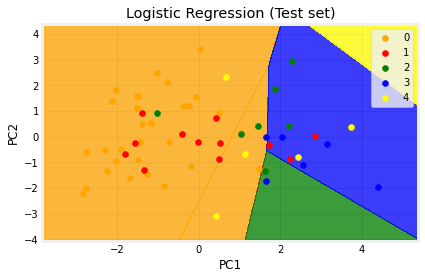

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, LG.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange','red', 'green', 'blue','yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange','red', 'green', 'blue','yellow'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### LDA

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [23]:
lda = LDA(n_components = 2)

In [24]:
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

In [25]:
explained_varience = lda.explained_variance_ratio_
explained_varience

array([0.98828876, 0.01171124])

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
LG = LogisticRegression(random_state=0)
LG.fit(X_train,Y_train)
Y_pred=LG.predict(X_test)
Y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 3, 0, 3, 1, 2, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0,
       0, 1, 2, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 1, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[28,  2,  0,  0,  0],
       [ 9,  0,  0,  3,  0],
       [ 1,  2,  1,  3,  0],
       [ 0,  1,  1,  4,  0],
       [ 1,  2,  0,  2,  0]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

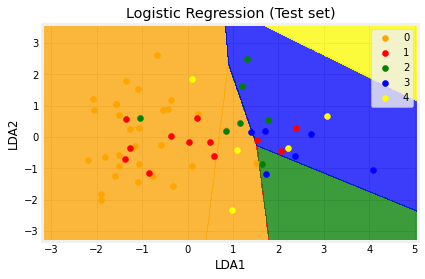

In [29]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, LG.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange','red', 'green', 'blue','yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange','red', 'green', 'blue','yellow'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend()
plt.show()

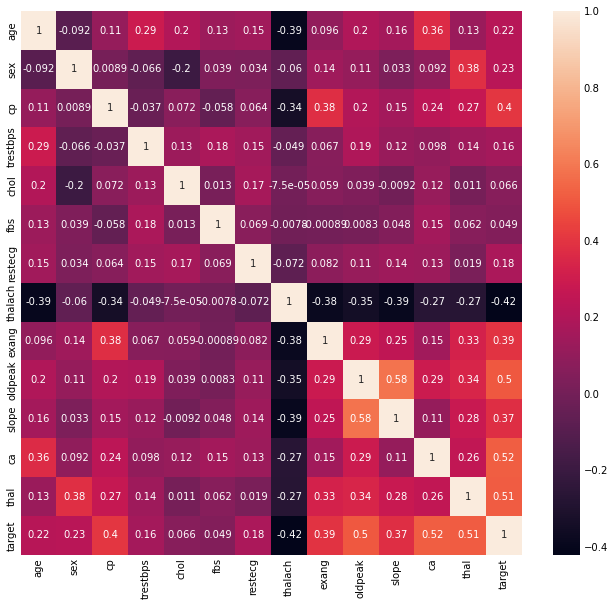

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

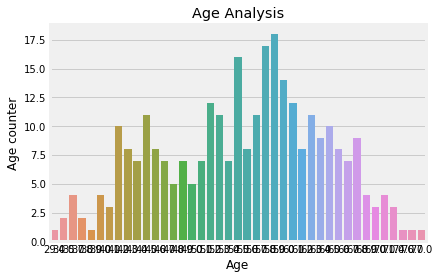

In [31]:
sns.barplot(x= df.age.value_counts()[:].index, y= df.age.value_counts()[:].values  )
plt.xlabel('Age')
plt.ylabel("Age counter")
plt.title("Age Analysis")
plt.show

In [32]:
df.target.value_counts()

0    160
1     54
2     35
3     35
4     13
Name: target, dtype: int64

In [33]:
#Distribution of class label
# 0 - Absent / no Disease  1,2,3,4 - Presence/yes

countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])

print("Percentage of patients that don't have heart disease : {:.2f}%".format((countNoDisease/(len(df.target)))*100))
print("Percentage of patients that have heart disease  : {:.2f}%".format((countHaveDisease/(len(df.target)))*100))


Percentage of patients that don't have heart disease : 53.87%
Percentage of patients that have heart disease  : 18.18%


In [34]:
countHaveDisease = len(df[df.target == 2])
print("Percentage of patients that don't have heart disease : {:.2f}%".format((countHaveDisease/(len(df.target)))*100))

Percentage of patients that don't have heart disease : 11.78%


In [35]:
countHaveDisease = len(df[df.target == 3])
print("Percentage of patients that don't have heart disease : {:.2f}%".format((countHaveDisease/(len(df.target)))*100))

Percentage of patients that don't have heart disease : 11.78%


In [36]:
countHaveDisease = len(df[df.target == 4])
print("Percentage of patients that don't have heart disease : {:.2f}%".format((countHaveDisease/(len(df.target)))*100))

Percentage of patients that don't have heart disease : 4.38%


In [37]:
#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

X=df.iloc[:, :-1].values
X

array([[63.,  1.,  1., ...,  3.,  0.,  6.],
       [67.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  1.,  4., ...,  2.,  2.,  7.],
       ...,
       [68.,  1.,  4., ...,  2.,  2.,  7.],
       [57.,  1.,  4., ...,  2.,  1.,  7.],
       [57.,  0.,  2., ...,  2.,  1.,  3.]])

In [38]:
y = df.iloc[:,13]
y

0      0
1      2
2      1
3      0
4      0
      ..
292    1
293    1
294    2
295    3
296    1
Name: target, Length: 297, dtype: int64

In [39]:
 
#Splitting the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)


In [40]:
# scaling the dataset
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [41]:
#Shape of train and test data
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (237, 13) (237,)
Test set: (60, 13) (60,)


In [42]:
# Using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [43]:
#Train Model  
neigh = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)
#Prediction
prediction = neigh.predict(X_test)
prediction1=pd.DataFrame(prediction)
prediction1.head()

,0
0,0
1,0
2,0
3,0
4,0


In [61]:
#Accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, prediction)

0.5666666666666667

In [45]:
# Now Using SVM Algorithm 
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [46]:
#Predict
y_pred=classifier.predict(X_test)

In [47]:
prediction2=pd.DataFrame(y_pred)
prediction2.head()

,0
0,0
1,0
2,3
3,0
4,0


In [48]:
#Accuracy
metrics.accuracy_score(y_test, prediction2)

0.5166666666666667

In [49]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction1)


array([[29,  1,  0,  0,  0],
       [ 8,  3,  1,  0,  0],
       [ 4,  1,  2,  0,  0],
       [ 0,  4,  2,  0,  0],
       [ 2,  1,  1,  1,  0]], dtype=int64)

In [50]:
confusion_matrix(y_test,prediction2)

array([[28,  2,  0,  0,  0],
       [ 9,  2,  1,  0,  0],
       [ 2,  2,  1,  2,  0],
       [ 2,  2,  2,  0,  0],
       [ 2,  1,  0,  2,  0]], dtype=int64)

In [51]:
#Using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
HeartTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [52]:
HeartTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [53]:
y_pred = HeartTree.predict(X_test)
prediction3=pd.DataFrame(y_pred)
prediction3.head()

,0
0,0
1,0
2,0
3,0
4,0


In [54]:
#Accuracy
metrics.accuracy_score(y_test,prediction3)

0.55

In [55]:
confusion_matrix(y_test,prediction3)

array([[27,  1,  1,  0,  1],
       [ 5,  2,  4,  0,  1],
       [ 2,  1,  4,  0,  0],
       [ 1,  1,  4,  0,  0],
       [ 3,  1,  1,  0,  0]], dtype=int64)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [57]:

# Importing functions to get the model fitting for the data 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix  
from sklearn.model_selection import cross_val_score
# Fitting all the models at the same time using 'for' loop
models=[LogisticRegression(multi_class="multinomial",solver="newton-cg"),
        LinearSVC(),
        SVC(kernel='rbf',gamma="auto"),
        KNeighborsClassifier(n_neighbors=10,metric="euclidean"),
        GaussianNB(),
        DecisionTreeClassifier(criterion="gini",max_depth=10),
        RandomForestClassifier(n_estimators=100),
        GradientBoostingClassifier()
        ]
model_names=['LogisticRegression',
             'LinearSVM',
             'rbfSVM',
             'KNearestNeighbors',
             'GaussianNB',
             'DecisionTree',
             'RandomForestClassifier',
             'GradientBoostingClassifier',
             ]
acc=[]

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(X_train,y_train)
    y_pred=classification_model.predict(X_test)
    acc.append(accuracy_score(y_pred,y_test))
    print("\n\n","confusion matrix of",model_names[model],"is ","\n",confusion_matrix(y_test,y_pred))  
d={'Modelling Algorithm':model_names,'Accuracy':acc}
acc_table=pd.DataFrame(d)
acc_table



 confusion matrix of LogisticRegression is  
 [[28  1  1  0  0]
 [ 7  3  1  1  0]
 [ 1  1  2  2  1]
 [ 0  1  3  2  0]
 [ 2  1  2  0  0]]


 confusion matrix of LinearSVM is  
 [[29  0  1  0  0]
 [ 9  1  1  1  0]
 [ 1  0  1  3  2]
 [ 1  0  3  2  0]
 [ 2  1  1  1  0]]


 confusion matrix of rbfSVM is  
 [[28  2  0  0  0]
 [ 9  2  1  0  0]
 [ 2  2  1  2  0]
 [ 2  2  2  0  0]
 [ 2  1  0  2  0]]


 confusion matrix of KNearestNeighbors is  
 [[29  1  0  0  0]
 [ 9  2  1  0  0]
 [ 2  0  4  1  0]
 [ 0  4  1  1  0]
 [ 2  2  1  0  0]]


 confusion matrix of GaussianNB is  
 [[27  1  1  0  1]
 [ 7  2  0  0  3]
 [ 1  0  1  2  3]
 [ 0  1  1  0  4]
 [ 0  3  0  1  1]]


 confusion matrix of DecisionTree is  
 [[21  4  3  2  0]
 [ 3  2  4  2  1]
 [ 2  0  2  1  2]
 [ 0  1  2  3  0]
 [ 2  0  2  1  0]]


 confusion matrix of RandomForestClassifier is  
 [[26  3  0  0  1]
 [ 9  1  1  0  1]
 [ 4  1  0  2  0]
 [ 2  3  0  1  0]
 [ 3  1  1  0  0]]


 confusion matrix of GradientBoostingClassifier is  
 [[2

,Modelling Algorithm,Accuracy
0,LogisticRegression,0.583333
1,LinearSVM,0.550000
2,rbfSVM,0.516667
3,KNearestNeighbors,0.600000
4,GaussianNB,0.516667
5,DecisionTree,0.466667
6,RandomForestClassifier,0.466667
7,GradientBoostingClassifier,0.516667


<AxesSubplot:xlabel='Accuracy', ylabel='Modelling Algorithm'>

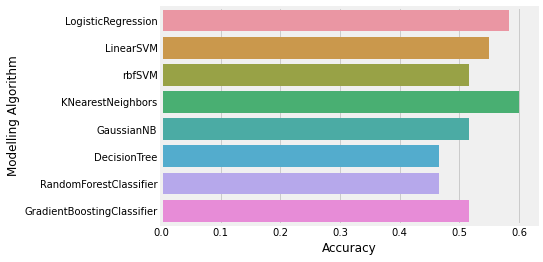

In [58]:
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_table)

In [59]:
#Finding 10 fold cross validation scores for all the models at the same time using 'for' loop 
models=[LogisticRegression(multi_class="multinomial",solver="newton-cg"),
        LinearSVC(),
        SVC(kernel='rbf',gamma="auto"),
        KNeighborsClassifier(n_neighbors=10,metric="euclidean"),
        GaussianNB(),
        DecisionTreeClassifier(criterion="gini",max_depth=10),
        RandomForestClassifier(n_estimators=100),
        GradientBoostingClassifier()
        ]
model_names=['LogisticRegression',
             'LinearSVM',
             'rbfSVM',
             'KNearestNeighbors',
             'GaussianNB',
             'DecisionTree',
             'RandomForestClassifier',
             'GradientBoostingClassifier',
             ]
cvs=[]
for model in range(len(models)):
    classification_model=models[model]
    clf=classification_model.fit(X_train,y_train)
    scores = cross_val_score(clf, X_test, y_test, cv=10)
    scores.mean()
    print(model_names[model]," 10 fold cross validation score == ",scores.mean(),"  \n\n")

LogisticRegression  10 fold cross validation score ==  0.5   


LinearSVM  10 fold cross validation score ==  0.4333333333333333   


rbfSVM  10 fold cross validation score ==  0.5666666666666667   


KNearestNeighbors  10 fold cross validation score ==  0.6   


GaussianNB  10 fold cross validation score ==  0.26666666666666666   


DecisionTree  10 fold cross validation score ==  0.5333333333333333   


RandomForestClassifier  10 fold cross validation score ==  0.55   


GradientBoostingClassifier  10 fold cross validation score ==  0.5333333333333333   




In [60]:
new_obs=[[52,1,2,172,199,1,1,162,0,0.5,2,0,3]]
pv=[]
for model in range(len(models)):
    classification_model=models[model]
    models[model].predict(new_obs)
    pv.append(models[model].predict(new_obs))
    
d={'Modelling Algorithm':model_names,'Predicted value':pv}
pred_table=pd.DataFrame(d)
pred_table

,Modelling Algorithm,Predicted value
0,LogisticRegression,[4]
1,LinearSVM,[4]
2,rbfSVM,[0]
3,KNearestNeighbors,[0]
4,GaussianNB,[3]
5,DecisionTree,[4]
6,RandomForestClassifier,[2]
7,GradientBoostingClassifier,[3]
